In [6]:
!pip install xgboost

In [7]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump


In [8]:
X_train = pd.read_csv("../../Split Data/Training Dataset/X_train #2.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../Split Data/Training Dataset/y_train #2.csv", index_col=0)
X_val = pd.read_csv("../../Split Data/Validation Dataset/X_val #2.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../Split Data/Validation Dataset/y_val #2.csv", index_col=0)
X_test = pd.read_csv("../../Split Data/Testing Dataset/X_test #2.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../Split Data/Testing Dataset/y_test #2.csv", index_col=0)

In [9]:
model = XGBClassifier(objective='binary:logistic', max_depth = 3, n_estimators = 1000, early_stopping_rounds=5,)

In [10]:
model.fit(X_train, y_train,  verbose = True, eval_set=[(X_val,y_val)])

[0]	validation_0-logloss:0.54345
[1]	validation_0-logloss:0.46334
[2]	validation_0-logloss:0.41770
[3]	validation_0-logloss:0.38749
[4]	validation_0-logloss:0.36903
[5]	validation_0-logloss:0.35646
[6]	validation_0-logloss:0.34693
[7]	validation_0-logloss:0.34122
[8]	validation_0-logloss:0.33539
[9]	validation_0-logloss:0.32786
[10]	validation_0-logloss:0.32438
[11]	validation_0-logloss:0.32127
[12]	validation_0-logloss:0.31892
[13]	validation_0-logloss:0.31540
[14]	validation_0-logloss:0.31280
[15]	validation_0-logloss:0.30887
[16]	validation_0-logloss:0.30698
[17]	validation_0-logloss:0.30465
[18]	validation_0-logloss:0.30227
[19]	validation_0-logloss:0.30102
[20]	validation_0-logloss:0.29948
[21]	validation_0-logloss:0.29839
[22]	validation_0-logloss:0.29556
[23]	validation_0-logloss:0.29473
[24]	validation_0-logloss:0.29323
[25]	validation_0-logloss:0.29266
[26]	validation_0-logloss:0.29115
[27]	validation_0-logloss:0.29013
[28]	validation_0-logloss:0.28923
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [11]:
y_pred = model.predict(X_test)

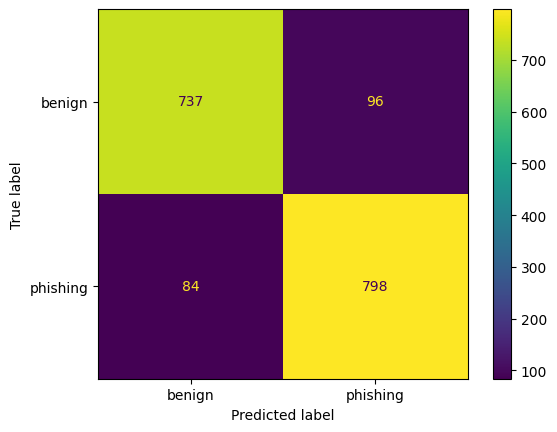

In [12]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [13]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [14]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8950437317784257, 'Precision': 0.8926174496644296, 'Recall': 0.9047619047619048, 'F1_score': 0.8986486486486487}


In [15]:
df = pd.read_csv("Metrics of Dataset #2.csv")

In [16]:
metrics = pd.DataFrame({"Model": "XGBoost", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [17]:
df = pd.concat([df, metrics], ignore_index=True)

In [18]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.869388,0.859170,0.892290,0.875417
1,Random Forest,0.900875,0.913953,0.891156,0.902411
2,XGBoost,0.895044,0.892617,0.904762,0.898649


In [19]:
df.to_csv("Metrics of Dataset #2.csv", index=False)

In [20]:
dump(model, 'XGBoost #2.joblib')

['XGBoost #2.joblib']